In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [5]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)

In [6]:
groupDf = df[['user_id', 'Toxicity','week','month']]

In [30]:
weekDf = groupDf[groupDf['week']=="01"]

In [31]:
user_list_week = list(weekDf['user_id'].unique().astype(str))

In [32]:
G_week = G.subgraph(user_list_week)

In [33]:
print(G.number_of_edges())
print(G.number_of_nodes())
print(G_week.number_of_edges())
print(G_week.number_of_nodes())

2194979
100386
2711
2122


In [34]:
weekDf.head()

,user_id,Toxicity,week,month
3722,714557249604227075,0.004304,01,01
3723,714557249604227075,0.007665,01,01
5293,20430045,0.399880,01,01
5294,20430045,0.028856,01,01
5295,20430045,0.168519,01,01


In [35]:
def get_neighbour_toxicity_mean(user):
  neighbours = list(G_week.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = weekDf[weekDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)

In [36]:
def get_user_toxicity_mean(user):
  userDf = weekDf[weekDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()

In [37]:
user_toxicity_means = []
neighbor_toxicity_means = []

In [38]:
for user in G_week.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)

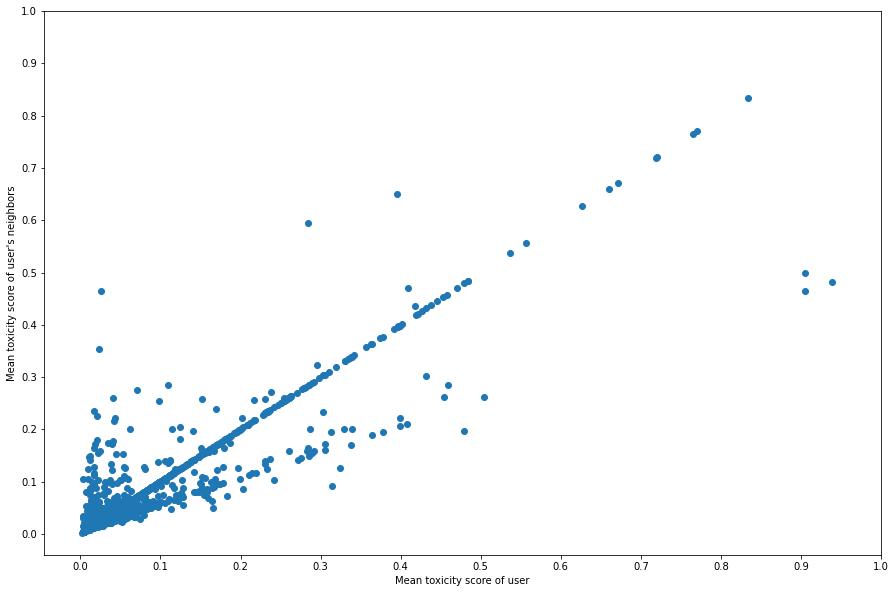

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

plt.xticks([i/10 for i in range(0, 11)])
plt.yticks([i/10 for i in range(0, 11)])
plt.show()

In [40]:
# For just a single user
'''
fix_user_id = "714557249604227075"
neighbor_user_list = list(G_week.neighbors(fix_user_id))
neighbourDf = weekDf[weekDf['user_id'].astype(str) == "714557249604227075"]
mean_toxicity = neighbourDf['Toxicity'].mean()
'''

'\nfix_user_id = "714557249604227075"\nneighbor_user_list = list(G_week.neighbors(fix_user_id))\nneighbourDf = weekDf[weekDf[\'user_id\'].astype(str) == "714557249604227075"]\nmean_toxicity = neighbourDf[\'Toxicity\'].mean()\n'

In [41]:
# def get_neighbour_toxicity_mean(user):
#   neighbours = list(G_week.neighbors(user))
#   temp_list = []
#   for neigh in neighbours:
#     neighbourDf = weekDf[weekDf['user_id']==neigh]
#     mean_toxicity = neighbourDf['Toxicity'].mean()
#     temp_list.append(mean_toxicity)
#   return sum(temp_list)/len(temp_list)

# def get_user_toxicity_mean(user):
#   userDf = weekDf[weekDf['user_id']==user]
#   return userDf['Toxicity'].mean()

# user_toxicity_means = []
# neighbor_toxicity_means = []
# for user in G_week.nodes():
#   user_mean = get_user_toxicity_mean(user)
#   neighbour_mean = get_neighbour_toxicity_mean(user)
#   user_toxicity_means.append(user_mean)
#   neighbor_toxicity_means.append(neighbour_mean)

In [42]:
'''
I have a users.edges file which has a edgelist for all the users. Each node here is a user id. 

And now I have a tweets.csv file. which has the following columns: -
1) user_id - contains the id's of the user
2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets
3) Toxicity - contains the toxicity score for each tweet. 

now looking at the users.edges file, how do I find the neighbors of a user and calculate the mean toxicity score of all the tweets that the neighbors have done? 
after this I also want to calculate the mean toxicity score of the tweets that the user has done. 

I want to do this for all the users, and after that make a scatter plot, where each user is a dot on the plot and 
x axis - mean of the toxicity scores of the user
y axis - mean of the toxicity scores of the user's neighbor. 

How do I do this in python?
'''

"\nI have a users.edges file which has a edgelist for all the users. Each node here is a user id. \n\nAnd now I have a tweets.csv file. which has the following columns: -\n1) user_id - contains the id's of the user\n2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets\n3) Toxicity - contains the toxicity score for each tweet. \n\nnow looking at the users.edges file, how do I find the neighbors of a user and calculate the mean toxicity score of all the tweets that the neighbors have done? \nafter this I also want to calculate the mean toxicity score of the tweets that the user has done. \n\nI want to do this for all the users, and after that make a scatter plot, where each user is a dot on the plot and \nx axis - mean of the toxicity scores of the user\ny axis - mean of the toxicity scores of the user's neighbor. \n\nHow do I do this in python?\n"

In [43]:
'''
I have a edgelist file called users.edgelist. This file contains the edges for a graph. The nodes in this graph are the users_id's.
I also have a csv file called the tweets.csv file. In this csv file, I have a column called user_id. 
Now the users.edgelist file contains more number of users than the tweets.csv user_id column file. 
How do I make sure that the users.edgelist file only contains the users from the user_id column in the tweets.csv file.
''' 

"\nI have a edgelist file called users.edgelist. This file contains the edges for a graph. The nodes in this graph are the users_id's.\nI also have a csv file called the tweets.csv file. In this csv file, I have a column called user_id. \nNow the users.edgelist file contains more number of users than the tweets.csv user_id column file. \nHow do I make sure that the users.edgelist file only contains the users from the user_id column in the tweets.csv file.\n"

In [44]:
'''
I am working on a Twitter dataset. 
I have a graph G which is loaded in networkx via an edgelist file. This graph contains users id's as nodes. 

And now I have a tweets.csv file. which has the following columns: -
1) user_id - contains the id's of the user
2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets
3) Toxicity - contains the toxicity score for each tweet. 
4) Week - contains the week number for a tweet.
A user_id has multiple tweet_id's and toxicity scores. 

how do I find the neighbours of a user and calculate the mean toxicity score of all the tweets that the neighbours have done? 
after this, I also want to calculate the mean toxicity score of the tweets that the user has done. 

and after that make a scatter plot, where 
x axis - mean of the toxicity scores of the user
y axis - mean of the toxicity scores of the user's neighbour. 
Here each user would be a dot on this scatter plot

How do I do this in python?
'''

"\nI am working on a Twitter dataset. \nI have a graph G which is loaded in networkx via an edgelist file. This graph contains users id's as nodes. \n\nAnd now I have a tweets.csv file. which has the following columns: -\n1) user_id - contains the id's of the user\n2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets\n3) Toxicity - contains the toxicity score for each tweet. \n4) Week - contains the week number for a tweet.\nA user_id has multiple tweet_id's and toxicity scores. \n\nhow do I find the neighbours of a user and calculate the mean toxicity score of all the tweets that the neighbours have done? \nafter this, I also want to calculate the mean toxicity score of the tweets that the user has done. \n\nand after that make a scatter plot, where \nx axis - mean of the toxicity scores of the user\ny axis - mean of the toxicity scores of the user's neighbour. \nHere each user would be a dot on this scatter plot\n\nHow do I do this in python?\n"